<a href="https://colab.research.google.com/github/LukeGSCSU/CSC-481linearRegressPrac/blob/main/Linear_RegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Luke Gomes Linear Regression Practice**

Importing data from different sources and using linear regression

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [123]:
df.shape

(25, 2)

Define the input and output to the model X and Y

In [124]:
X = df.drop('Scores', axis = 1)
y = df['Scores']

Drawing Relationship between Hours and Scores

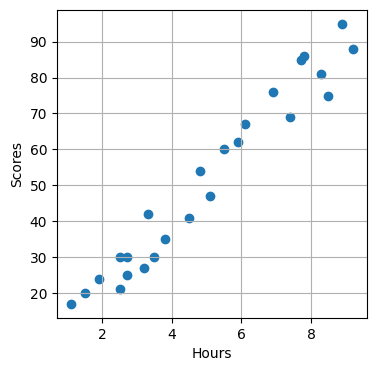

In [125]:
plt.figure(figsize = (4,4))

plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)

plt.show()

Importing required libraries for linear regression from sklearn

In [126]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

Intialize your LR model and set hyperparameters

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [129]:
alpha = model.intercept_
beta = model.coef_

print("alpha", "{:.2f}".format(alpha))
print("beta", beta)

print(f"y = {alpha} + {beta} X")

alpha -0.34
beta [10.28085594]
y = -0.33798242262133016 + [10.28085594] X


Calculate actual and estimated responses at both training and testing cases

In [130]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Drawing the actual and estimated in both training and testing cases

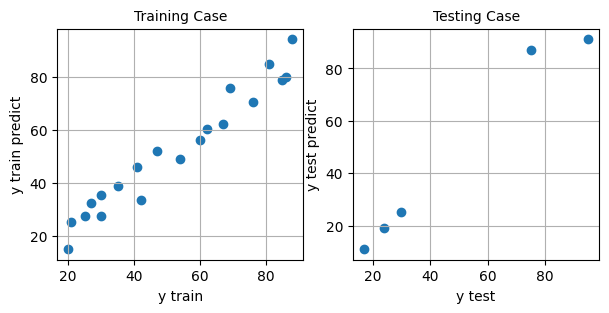

In [131]:
plt.figure(figsize=(7,3))

# subplot 1
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train)
plt.xlabel("y train")
plt.ylabel("y train predict")
plt.title("Training Case", fontsize = 10)
plt.grid(True)

# subplot 2
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test)
plt.xlabel("y test")
plt.ylabel("y test predict")
plt.title("Testing Case", fontsize = 10)
plt.grid(True)

plt.show()

Calculate Model using MSE & MAE

In [132]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

create a dataframe of the results

In [133]:
performance_df = pd.DataFrame({
    'Metric' : ['MSE', 'MAE', 'MSE', 'MAE'],
    'DataType' : ['train', 'train', 'test', 'test'],
    'Values' : [mse_train, mae_train, mse_test, mae_test]
})

performance_df.T

,0,1,2,3
Metric,MSE,MAE,MSE,MAE
DataType,train,train,test,test
Values,26.118428,4.871914,48.168143,6.271379
